**Ironhack Project-4 |** Requesting information from the local API

---

**Libraries**

In [19]:
# Requests
import main_queries as qry
import requests

# Visualization
import visualization as vis
import seaborn as sns
import matplotlib.pyplot as plt

import stylecloud
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (8,5)})
sns.set_style("whitegrid")

---

# Requests | GET

**Getting the TOP 10 characters of the show by number of sentences**

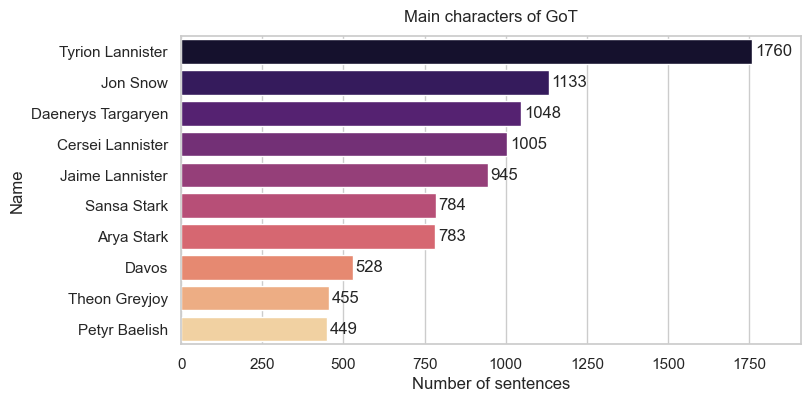

In [2]:
top10 = qry.get_my_top_characters()[:10]
# Visualization
fig_num_sentences = sns.barplot(data = top10, y = 'Name', x = 'Number of sentences', palette = 'magma')
fig_num_sentences.bar_label(fig_num_sentences.containers[0], padding = 2)
fig_num_sentences.set(xlim=(0, 1910))
plt.title("Main characters of GoT", y = 1.02)
# Exporting figure
plt.savefig('./output/number_sentences.jpg', dpi=1000, bbox_inches='tight');

**Getting the script of a character**

Checking that the API returns the script of the specified character:

In [3]:
jon_snow_1x01 = qry.get_my_character(season = "season 1", episode = "episode 1", name = "jon snow")
jon_snow_1x01.head()

,Episode,Episode Title,ID,Name,Season,Sentence
0,Episode 1,Winter is Coming,15,Jon Snow,Season 1,Go on. Father's watching.
1,Episode 1,Winter is Coming,16,Jon Snow,Season 1,And your mother.
2,Episode 1,Winter is Coming,21,Jon Snow,Season 1,"Don't think too much, Bran."
3,Episode 1,Winter is Coming,38,Jon Snow,Season 1,Don't look away.
4,Episode 1,Winter is Coming,40,Jon Snow,Season 1,Father will know if you do.


Checking what the return if bad request:

In [4]:
jon_snow_1x01_fail = qry.get_my_character(season = "season 1", episode = "episode 1", name = "jon snowe") #invalid name
jon_snow_1x01_fail

'Oops! There was an error in your request. Check our docs for the supported season, episode, and character names.'

## Sentiment Analysis

### Comparing WITH and WITHOUT stopwords

In [2]:
# Params
season_list = ['season 1', 'season 2', 'season 3', 'season 4', 'season 5', 'season 6', 'season 7', 'season 8']
name_list = ["arya stark"]
# Request
with_stopwords = qry.sa_by_seasons_mean(seasons = season_list, names = name_list)
without_stopwords = qry.sa_by_seasons_mean(seasons = season_list, stop = "stop", names = name_list)

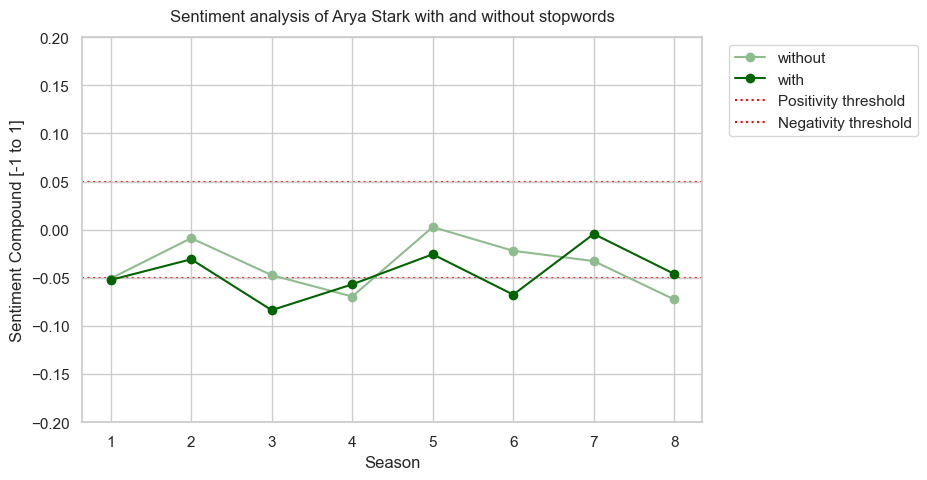

In [3]:
# Visualization
fig_comparison, ax = plt.subplots()
ax.plot(without_stopwords['Arya Stark'], '-o', color='darkseagreen', label='without')
ax.plot(with_stopwords['Arya Stark'], '-o', color='darkgreen', label='with')
vis.add_labels_season(title = "Sentiment analysis of Arya Stark with and without stopwords", xlabel = "Season", num_seasons = len(season_list))
# Exporting figure
plt.savefig('./output/comparison_stopwords.jpg', dpi=1000, bbox_inches='tight');

**Conclusion:** It doesn't make much of a difference.

### Top positive and negative MAIN characters

In [4]:
top20 = qry.get_my_top_characters()[:20]
top20_names = top20['Name'].to_list()
sa_top_20 = qry.sa_by_character_mean(names = top20_names)

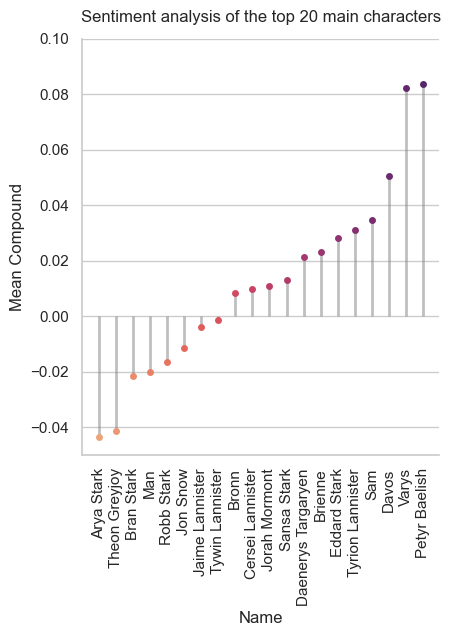

In [8]:
# Visualization
fig_top_sa = sns.catplot(data = sa_top_20, y = 'Mean Compound', x = 'Name', palette = 'flare', jitter = 0)
fig_top_sa.set_xticklabels(rotation=90)
plt.vlines(sa_top_20['Name'], 0, sa_top_20['Mean Compound'], color = "grey", lw=2, alpha=0.5)
plt.title("Sentiment analysis of the top 20 main characters", y = 1.02)
plt.ylim(-0.05,0.1)

# Exporting figure
plt.savefig('./output/top_compound.jpg', dpi=1000, bbox_inches='tight');

### Character sentiment evolution

In [9]:
# Params
season_list = ['season 1', 'season 2', 'season 3', 'season 4', 'season 5', 'season 6', 'season 7', 'season 8']
name_list = ['tyrion lannister', 'jon snow', 'daenerys targaryen', 'cersei lannister']
# Request
sentiment_evolution = qry.sa_by_seasons_mean(seasons = season_list, names = name_list)

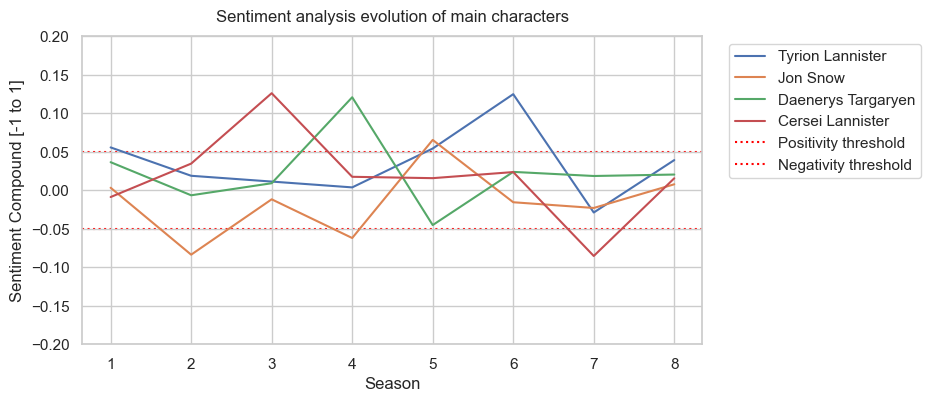

In [10]:
# Visualization
fig_sentiment_evolution = sentiment_evolution.plot()
vis.add_labels_season(title = "Sentiment analysis evolution of main characters", xlabel = "Season", num_seasons = len(season_list))
# Exporting figure
plt.savefig('./output/sa_evolution.jpg', dpi=1000, bbox_inches='tight');

### Theon Greyjoy vs Ramsay Bolton

In [11]:
# Params
season_list = ['season 1', 'season 2', 'season 3', 'season 4', 'season 5', 'season 6', 'season 7', 'season 8']
name_list = ['theon greyjoy', 'ramsay bolton']
# Request
sa_theon_ramsay = qry.sa_by_seasons_mean(seasons = season_list, names = name_list)

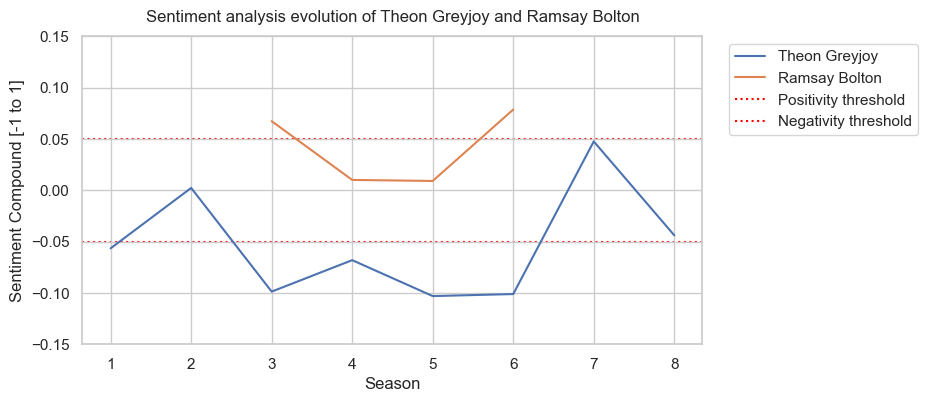

In [12]:
# Visualization
fig_theon_ramsay = sa_theon_ramsay.plot()
vis.add_labels_season(title = "Sentiment analysis evolution of Theon Greyjoy and Ramsay Bolton", xlabel = "Season", num_seasons = len(season_list), ylim_min = -0.15, ylim_max = 0.15)
# Exporting figure
plt.savefig('./output/sa_theon_ramsay.jpg', dpi=1000, bbox_inches='tight');

### Petyr Baelish vs Varys

In [13]:
# Params
season_list = ['season 1', 'season 2', 'season 3', 'season 4', 'season 5', 'season 6', 'season 7', 'season 8']
name_list = ['petyr baelish', 'varys', 'arya stark', 'theon greyjoy']
# Request
sa_peter_varys = qry.sa_by_seasons_mean(seasons = season_list, names = name_list)

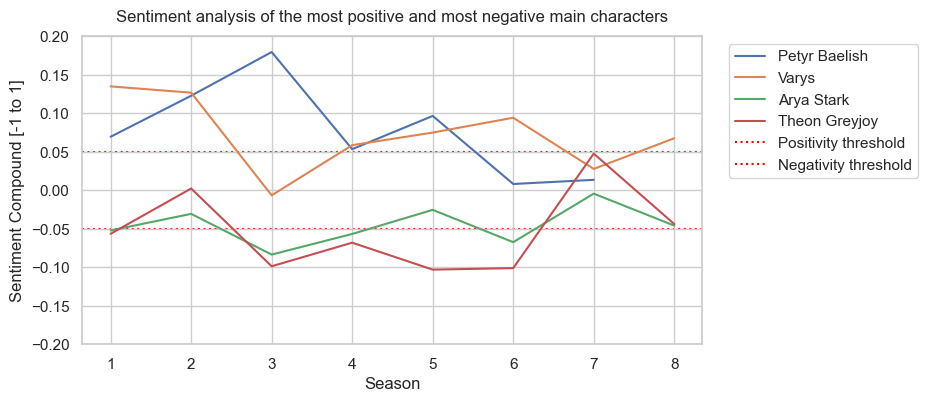

In [14]:
# Visualization
fig_peter_varys = sa_peter_varys.plot()
vis.add_labels_season(title = "Sentiment analysis of the most positive and most negative main characters", xlabel = "Season", num_seasons = len(season_list))
# Exporting figure
plt.savefig('./output/sa_peter_varys.jpg', dpi=1000, bbox_inches='tight');

### Oberyn Martell vs The Mountain

In [15]:
# Params
episode_list = ['episode 1', 'episode 2', 'episode 3', 'episode 4', 'episode 5', 'episode 6', 'episode 7', 'episode 8', 'episode 9', 'episode 10']
name_list = ['oberyn martell', 'mountain']
# Request
sa_oberyn_mountain = qry.sa_by_episodes_mean(season = 'season 4', episode = episode_list, names = name_list)

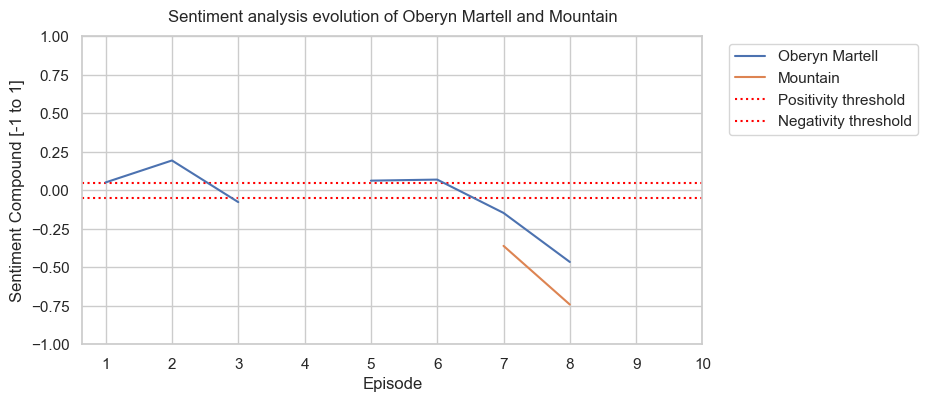

In [16]:
# Visualization
fig_oberyn_mountain = sa_oberyn_mountain.plot()
vis.add_labels_season(title = "Sentiment analysis evolution of Oberyn Martell and Mountain", xlabel = "Episode", num_seasons = len(episode_list), ylim_min = -1, ylim_max = 1)
# Exporting figure
plt.savefig('./output/sa_oberyn_mountain.jpg', dpi=1000, bbox_inches='tight');

### Joffrey Lannister vs Sansa Stark

In [17]:
# Params
season_list = ['season 1', 'season 2', 'season 3', 'season 4', 'season 5', 'season 6', 'season 7', 'season 8']
name_list = ['joffrey lannister', 'sansa stark']
# Request
sa_joffrey_sansa = qry.sa_by_seasons_mean(seasons = season_list, names = name_list)

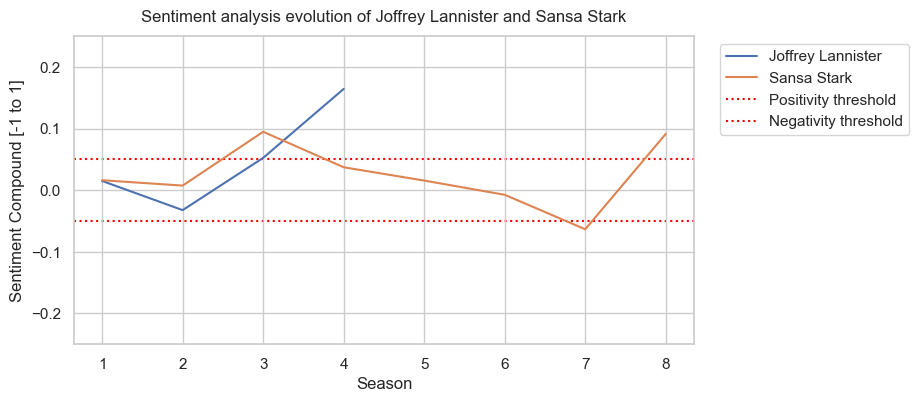

In [18]:
# Visualization
fig_joffrey_sansa = sa_joffrey_sansa.plot()
vis.add_labels_season(title = "Sentiment analysis evolution of Joffrey Lannister and Sansa Stark", xlabel = "Season", num_seasons = len(season_list), ylim_min = -0.25, ylim_max = 0.25)

### Word Clouds

In [36]:
# Params
name_list = ['tyrion lannister', 'young hodor', 'hodor', 'varys', 'petyr baelish', 'cersei lannister', 'arya stark', 'daenerys targaryen', 'jon snow']
# Request
sentences_wordcloud = qry.sentences_by_character(names = name_list)
# Cleaning
tyrion = qry.clean_sentences(sentences_wordcloud, "Tyrion Lannister")
young_hodor = qry.clean_sentences(sentences_wordcloud, "Young Hodor")
hodor = qry.clean_sentences(sentences_wordcloud, "Hodor")
varys = qry.clean_sentences(sentences_wordcloud, "Varys")
petyr = qry.clean_sentences(sentences_wordcloud, "Petyr Baelish")
cersei = qry.clean_sentences(sentences_wordcloud, "Cersei Lannister")
arya = qry.clean_sentences(sentences_wordcloud, "Arya Stark")
daenerys = qry.clean_sentences(sentences_wordcloud, "Daenerys Targaryen")
jon = qry.clean_sentences(sentences_wordcloud, "Jon Snow")

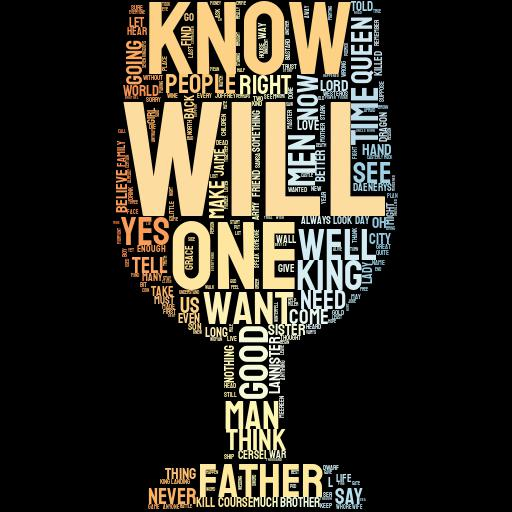

In [12]:
# Visualization
vis.print_stylecloud(tyrion, "tyrion_wordcloud", 'fas fa-wine-glass', 'colorbrewer.diverging.RdYlBu_11')

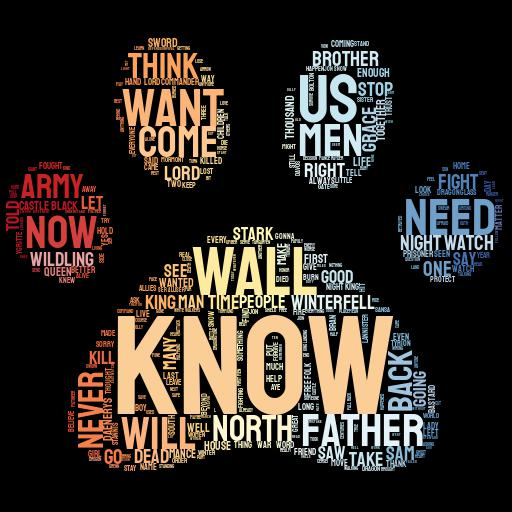

In [42]:
vis.print_stylecloud(jon, "jon_wordcloud", 'fas fa-paw', 'colorbrewer.diverging.RdYlBu_11')

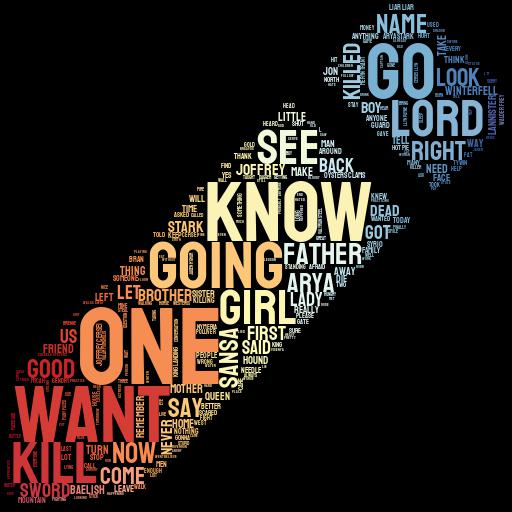

In [47]:
vis.print_stylecloud(arya, "arya_wordcloud", 'fas fa-pen', 'colorbrewer.diverging.RdYlBu_11')

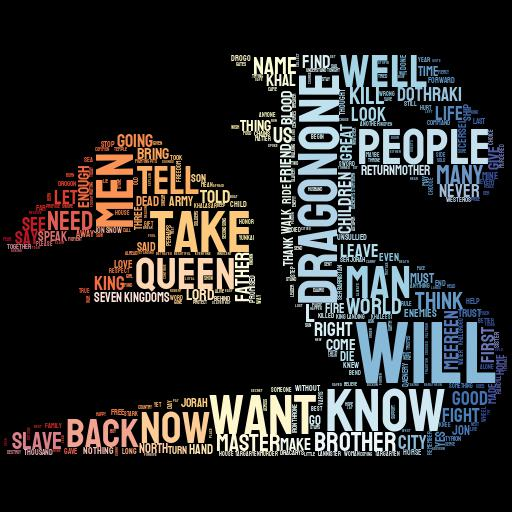

In [29]:
vis.print_stylecloud(daenerys, "daenerys_wordcloud", 'fas fa-dragon', 'colorbrewer.diverging.RdYlBu_11')

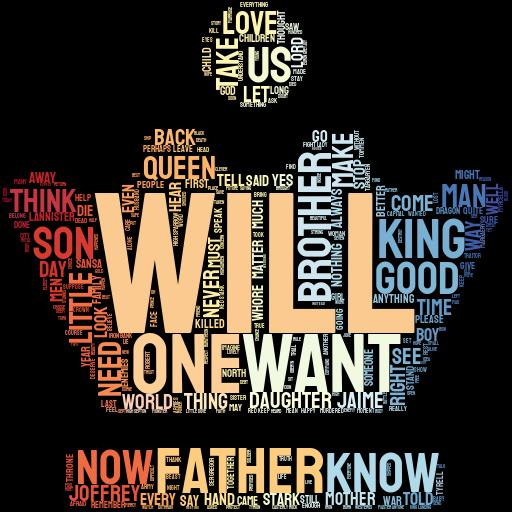

In [51]:
vis.print_stylecloud(cersei, "cersei_wordcloud", 'fas fa-chess-queen', 'colorbrewer.diverging.RdYlBu_11')

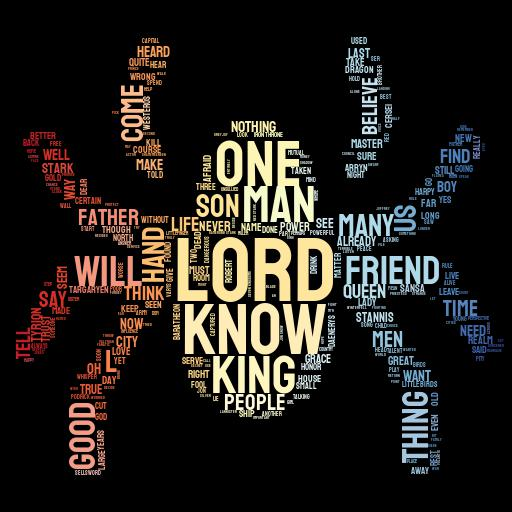

In [13]:
vis.print_stylecloud(varys, "varys_wordcloud", 'fas fa-spider', 'colorbrewer.diverging.RdYlBu_11')

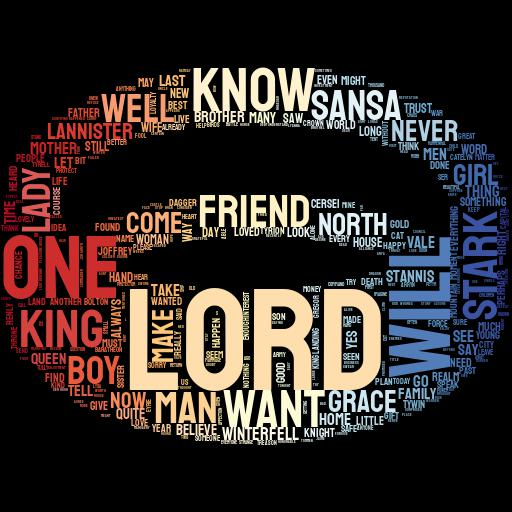

In [16]:
vis.print_stylecloud(petyr, "petyr_wordcloud", 'fas fa-ring', 'colorbrewer.diverging.RdYlBu_11')

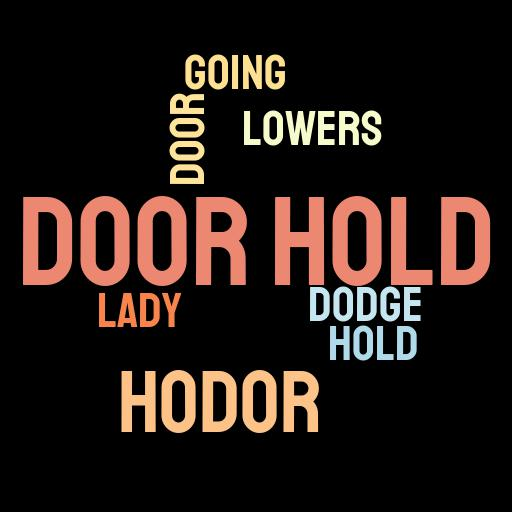

In [55]:
vis.print_stylecloud(young_hodor, "young_hodor_wordcloud", 'fas fa-circle', 'colorbrewer.diverging.RdYlBu_11')

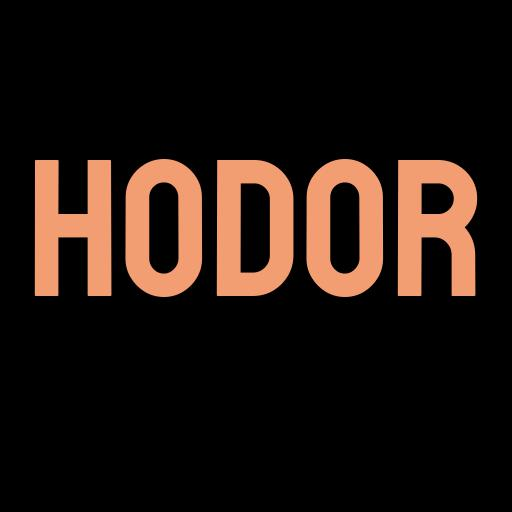

In [54]:
vis.print_stylecloud(hodor, "hodor", 'fas fa-circle', 'colorbrewer.diverging.RdYlBu_11')

In [ ]:
'colorbrewer.diverging.Spectral_11'

# Requests | POST

In [14]:
# Data to be send to API
params = {'ID':'23911',
        'Release Date':'2022-11-12',
        'Season':'Season 8',
        'Episode':'Episode 6',
        'Episode Title':'The Iron Throne',
        'Name': 'Marc Planas',
        'Sentence':'Really?'}

url = "http://127.0.0.1:5000"
endpoint = "/insertrow"

# Sending post request
# r = requests.post(url = url + endpoint, params = params)
# r

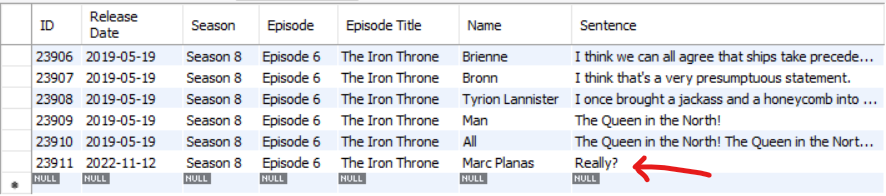

In [26]:
# Data to be send to API
params_3 = {'ID': '23916',
            'Release Date':'',
        'Season':'Season 8',
        'Episode':'Episode 6',
        'Episode Title':'The Iron Throne',
        'Name': 'Marc Planas',
        'Sentence':'This is a second test'}

url = "http://127.0.0.1:5000"
endpoint = "/insertrow"

# Sending post request
# r = requests.post(url = url + endpoint, params = params_3)
# r

<Response [200]>